# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 119kB/s 
     |████████████████████████████████| 450kB 48.4MB/s 
     |████████████████████████████████| 3.8MB 42.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=46aa1da4c320cb110b597b259ed3075c1329d4cab9e178e0539ec0cdaff4c818
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2


## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [7]:
print('**************')
!ls "/content/drive/My Drive/NLP/Project_Sarcasm/News-Headlines-Dataset-For-Sarcasm-Detection-master"
print('**************')

**************
README.md			wordcloud_non_sarcastic.png
Sarcasm_Headlines_Dataset.json	wordcloud_sarcastic.png
**************


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import keras

Using TensorFlow backend.


In [32]:
#Set your project path 
project_path =  "/content/drive/My Drive/NLP/Project_Sarcasm/"

In [33]:
!ls "/content/drive/My Drive/NLP/Project_Sarcasm/"

 Data
 News-Headlines-Dataset-For-Sarcasm-Detection-master
'NLP_Project_Sarcasm_Detection_Questions (1).ipynb'
 Sarcasm_Headlines_Dataset.json


In [34]:
project_path

'/content/drive/My Drive/NLP/Project_Sarcasm/'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [36]:
df_Sarcasm = pd.read_json(project_path + "Data/Sarcasm_Headlines_Dataset.json", lines= True)

In [37]:
df_Sarcasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [38]:
df_Sarcasm.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [39]:
df_Sarcasm.isnull().count()

is_sarcastic    28619
headline        28619
article_link    28619
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f797915c278>]],
      dtype=object)

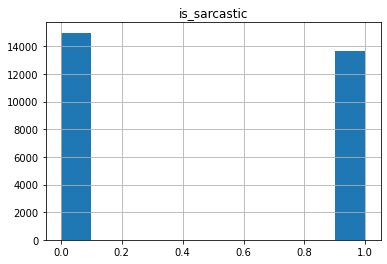

In [40]:
df_Sarcasm.hist()

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [41]:
df_Sarcasm.drop('article_link', axis = 1, inplace=True)

In [42]:
df_Sarcasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [43]:
"""
maxLength = 0
def LineLength(text):
  if(len(text) > maxLength):
    maxLength = len(text)


def MaxLength():
  maxLength = 0
  lineLength = df_Sarcasm['headline'].apply(LineLength)
  if(lineLength > maxLength):
    maxLength = lineLength
  return maxLength
"""

"\nmaxLength = 0\ndef LineLength(text):\n  if(len(text) > maxLength):\n    maxLength = len(text)\n\n\ndef MaxLength():\n  maxLength = 0\n  lineLength = df_Sarcasm['headline'].apply(LineLength)\n  if(lineLength > maxLength):\n    maxLength = lineLength\n  return maxLength\n"

In [44]:
maxLength = len(df_Sarcasm.headline.max())

#**## Modelling**

## Import required modules required for modelling.

In [45]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [46]:
max_features = 10000
maxlen = maxLength
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_Sarcasm['headline'])

# Define X and y for your model.

In [48]:
X = tokenizer.texts_to_sequences(df_Sarcasm['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df_Sarcasm['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 28619
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0 16003   354  3166  7473  2643     2   660  1118]
Number of Labels:  28619
1


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [49]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'at': 14,
 'from': 15,
 'about': 16,
 'by': 17,
 'after': 18,
 'you': 19,
 'this': 20,
 'out': 21,
 'up': 22,
 'be': 23,
 'as': 24,
 'that': 25,
 'it': 26,
 'how': 27,
 'not': 28,
 'he': 29,
 'his': 30,
 'are': 31,
 'your': 32,
 'just': 33,
 'what': 34,
 'all': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'report': 39,
 'into': 40,
 'more': 41,
 'one': 42,
 'have': 43,
 'year': 44,
 'over': 45,
 'why': 46,
 'day': 47,
 'u': 48,
 'area': 49,
 'woman': 50,
 'can': 51,
 's': 52,
 'says': 53,
 'donald': 54,
 'time': 55,
 'first': 56,
 'like': 57,
 'no': 58,
 'her': 59,
 'get': 60,
 'off': 61,
 'old': 62,
 "trump's": 63,
 'life': 64,
 'now': 65,
 'people': 66,
 "'": 67,
 'an': 68,
 'house': 69,
 'still': 70,
 'obama': 71,
 'white': 72,
 'back': 73,
 'make': 74,
 'was': 75,
 'than': 76,
 'women': 77,
 'if': 78,
 'down': 79,
 'when': 80,
 'i': 81,
 'my':

#**## Word Embedding**

## Get Glove Word Embeddings

In [50]:
glove_file = project_path + "/Data/glove.6B.zip"

In [51]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [52]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [53]:
num_words = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [ ]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

In [54]:
model = Sequential()

In [55]:
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(1,activation='sigmoid'))

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         6177000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
dense (Dense)                (None, None, 64)          16448     
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           65        
Total params: 6,530,409
Trainable params: 6,530,409
Non-trainable params: 0
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [58]:
batch_size = 100
epochs = 5

## Add your code here ##
model.fit(X,y,
          epochs=epochs,
          batch_size=batch_size,
          verbose = 1,
          validation_split=0.2)

Train on 22895 samples, validate on 5724 samples
Epoch 1/5
22895/22895 [==============================] - 231s 10ms/sample - loss: 0.4613 - accuracy: 0.7803 - val_loss: 0.3317 - val_accuracy: 0.8580
Epoch 2/5
22895/22895 [==============================] - 221s 10ms/sample - loss: 0.2439 - accuracy: 0.9057 - val_loss: 0.2959 - val_accuracy: 0.8690
Epoch 3/5
22895/22895 [==============================] - 221s 10ms/sample - loss: 0.1262 - accuracy: 0.9557 - val_loss: 0.4394 - val_accuracy: 0.8661
Epoch 4/5
22895/22895 [==============================] - 222s 10ms/sample - loss: 0.0755 - accuracy: 0.9765 - val_loss: 0.5045 - val_accuracy: 0.8618
Epoch 5/5
22895/22895 [==============================] - 223s 10ms/sample - loss: 0.0390 - accuracy: 0.9887 - val_loss: 0.4391 - val_accuracy: 0.8586


In [59]:
y_pred = model.predict(X)

In [60]:
y_pred.shape

(28619, 96, 1)

In [61]:
y

array([1, 0, 0, ..., 0, 1, 1])